<a href="https://colab.research.google.com/github/2303A52006/AIML/blob/main/2303A52006Aiml_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [2]:

summary = df.describe(percentiles=[.25, .50, .75, .90])
summary
column_names = df.columns.tolist()
column_names

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

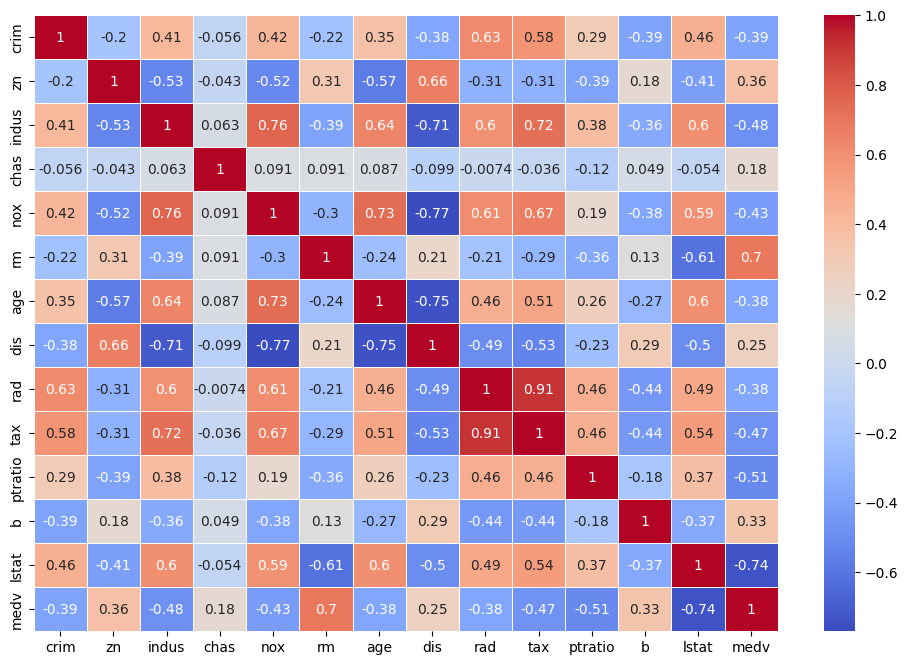

In [4]:
# Generate a correlation matrix
corr_matrix = df.corr()
# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
# Define the dependent variable (Price) and independent variables (all numerical features except Price)
dependent_var = 'medv'  # Assuming 'medv' represents the price
independent_vars = df.drop(columns=[dependent_var]).columns.tolist()
# Display the list of dependent and independent variables
print(f"Dependent Variable: {dependent_var}")
print(f"Independent Variables: {independent_vars}")

Dependent Variable: medv
Independent Variables: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


In [ ]:
l_column = list(df.columns)
len_feature = len(l_column)
l_column, len_feature
X = df[l_column[2:len_feature-1]]
y = df[l_column[len_feature-1]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (506, 11)
Variable set size: (506,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)
y_train.shape, y_test.shape, X_train.shape, X_test.shape
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (404, 11)
Test feature set size: (102, 11)
Training variable set size: (404,)
Test variable set size: (102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

The intercept term of the linear model: 31.614427415000556
The coefficients of the linear model: [ 5.86174583e-02  1.46212057e+00 -1.50686464e+01  4.52038116e+00
 -5.08599956e-03 -1.03662650e+00  2.21197717e-01 -1.07173483e-02
 -1.02139492e+00  7.48823914e-03 -5.66885485e-01]


,Coefficients
indus,0.058617
chas,1.462121
nox,-15.068646
rm,4.520381
age,-0.005086
dis,-1.036627
rad,0.221198
tax,-0.010717
ptratio,-1.021395
b,0.007488


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
Coefficients:
 const      36.459488
crim       -0.108011
zn          0.046420
indus       0.020559
chas        2.686734
nox       -17.766611
rm          3.809865
age         0.000692
dis        -1.475567
rad         0.306049
tax        -0.012335
ptratio    -0.952747
b           0.009312
lstat      -0.524758
dtype: float64

Standard Errors:
 const      5.103459
crim  

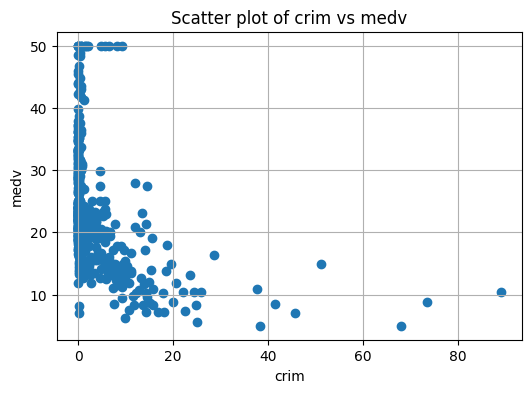

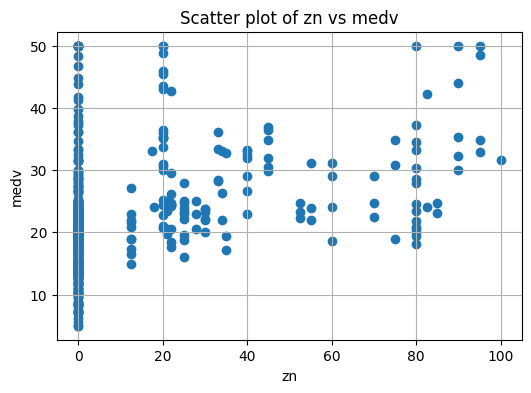

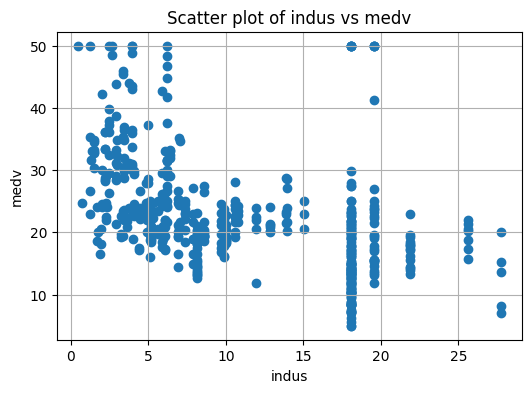

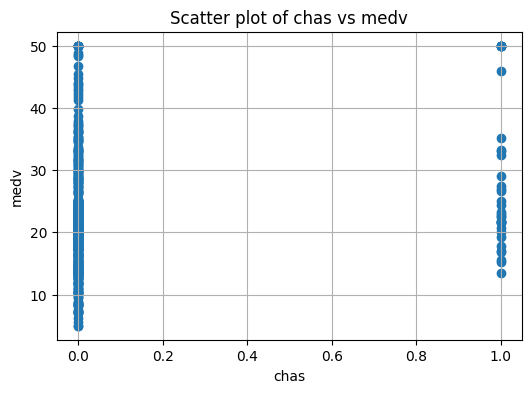

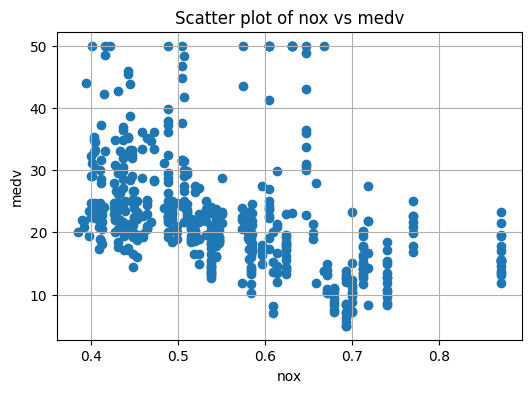

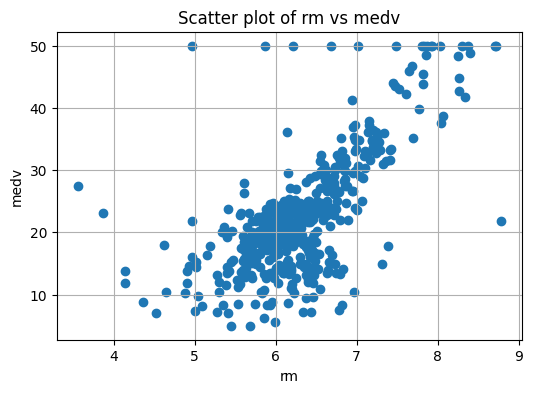

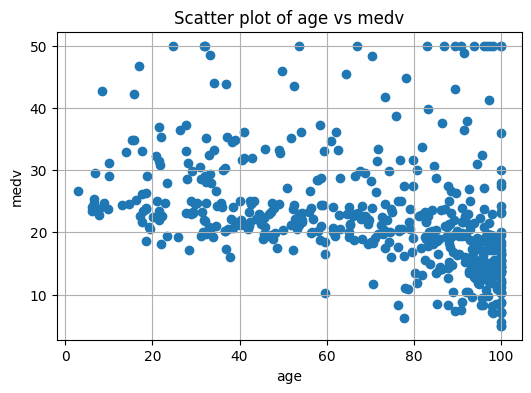

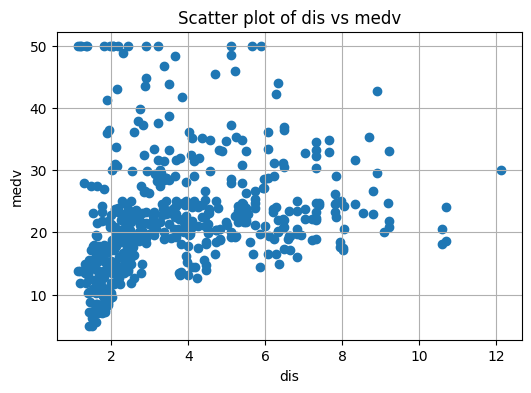

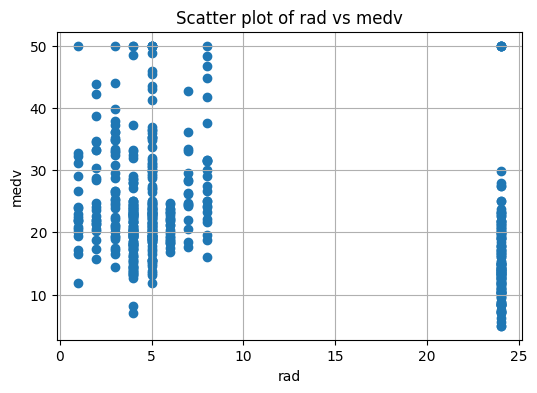

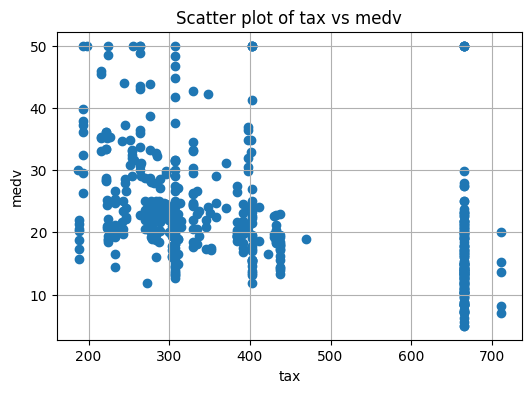

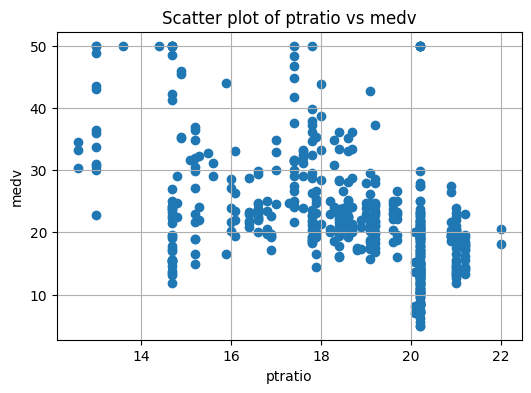

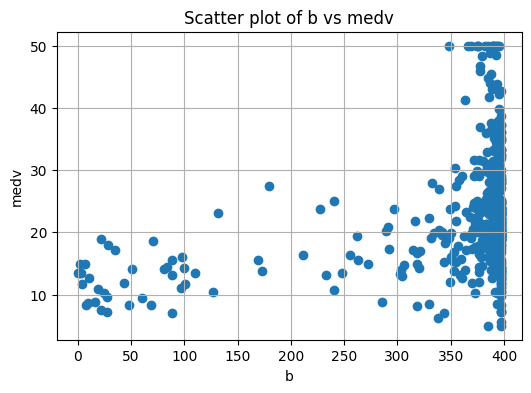

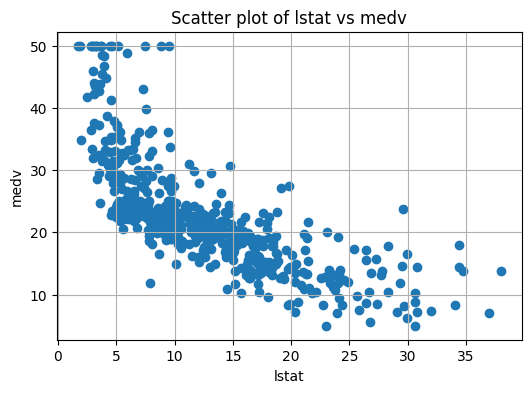

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm
print(df.head())
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
coefficients = model.params
standard_errors = model.bse
t_statistics = coefficients / standard_errors
cdf_values = norm.cdf(coefficients)
sorted_coefficients = coefficients.sort_values(key=lambda x: norm.cdf(x))
print("Coefficients:\n", coefficients)
print("\nStandard Errors:\n", standard_errors)
print("\nT-statistics:\n", t_statistics)
print("\nCDF Values:\n", cdf_values)
print("\nSorted Coefficients by CDF:\n", sorted_coefficients)
for feature in X.columns[1:]:
    plt.figure(figsize=(6,4))
    plt.scatter(df[feature], df['medv'])
    plt.xlabel(feature)
    plt.ylabel('medv')
    plt.title(f'Scatter plot of {feature} vs medv')
    plt.grid(True)
    plt.show()

In [ ]:
# Compute Min-Max for Observed and Expected Prices
import pandas as pd
import statsmodels.api as sm
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

min_observed = y.min()
max_observed = y.max()

min_expected = y_pred.min()
max_expected = y_pred.max()

print(f"Observed Price (Min, Max): ({min_observed}, {max_observed})")
print(f"Expected Price (Min, Max): ({min_expected}, {max_expected})")


min_value = min(min_observed, min_expected)
max_value = max(max_observed, max_expected)

print(f"MinMax Range between Observed and Expected Prices: ({min_value}, {max_value})")

Observed Price (Min, Max): (5.0, 50.0)
Expected Price (Min, Max): (-4.281310709184915, 44.67308338731289)
MinMax Range between Observed and Expected Prices: (-4.281310709184915, 50.0)
